In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Let $\mathcal{N}(\cdot|\widehat{\theta}_k, \sigma)$ be the SBI posteior of some data realisation $\mathcal{D}_k$ (let's consider that all the posterior share the same variance $\sigma$ for simplicity). 

- Let $\widehat{\theta}_k\sim \mathcal{N}(\cdot|\theta_0, \sigma_0)$ (something like the latent likelihood doing that).

- Let introduce the probability coverage for the $k$-th posterior

$$
\widehat{p} = 2 \int_{\theta_0}^{\infty}\mathcal{N}(x|\widehat{\theta}_k, \sigma) dx \leq 1
$$
- $\widehat{p}=1$ if $\widehat{\theta}_k = \theta_0$, and $\widehat{p}\sim 0$ if $\widehat{\theta}_k$ is very far from $\theta_0$ with respect to error-bars.
- We can show that (I did it):
- if $\sigma = \sigma_0$, then, if we consider $P(p)$ the probability density function of $p$, then its cumulative
$$
C(p) = \int_0^p P(p')dp' = p
$$
- However, if $\sigma \neq \sigma_0$, it shapes differently (not that simple, but we don't care). If $C(p) < p$, then it means that we have a larger fraction of samples that have a bigger tension wrt.the fiducial $\theta_0$, i.e. error-bars $\sigma$ are too small, the SBI provides too small error-bars in the end, we are over-confident.
- We are under-confident otherwise (error-bars are too big).

Let's code that:
her below we code (using erf, since everything is gaussian): 
$$
\widehat{p} = 2 \int_{\theta_0}^{\infty}\mathcal{N}(x|\widehat{\theta}_k, \sigma) \ dx = 1 - \mathrm{erf}\left(\frac{\widehat{\theta}-\theta_0}{\sqrt{2}\sigma}\right)
$$

Sometimes it is easier to use sigmas instead of confidenc intervals, which are easier to compute. We have that
- $n_\sigma = \sqrt{2} \mathrm{erf}^{-1}(\Delta)$ where $\Delta = 1 - p$

In [2]:
from scipy import special
theta0 = 0 #fiducial theta_0
sigma_1 = 1 #posterior dispersion
def p(x, theta0, sigma_1):
    res = []
    for x_ in x:
        
        if x_ < theta0:
            res.append( 1 - special.erf((theta0 - x_)/(np.sqrt(2)*sigma_1)) )
        else: 
            res.append( 1 - special.erf((theta0 + x_)/(np.sqrt(2)*sigma_1)) )
    return np.array(res)    

In [3]:
sigma_2 = 1
x = theta0 + sigma_2 * np.random.randn(100000)
p_rand_1 = p(x, theta0, sigma_1)
n_sigma_1 = abs(x - theta0)/sigma_1
p_rand_1_from_n_sigma_1 = 1-special.erf(n_sigma_1/np.sqrt(2))
#
sigma_2 = 1.5
x = theta0 + sigma_2 * np.random.randn(100000)
p_rand_2 = p(x, theta0, sigma_1)
n_sigma_2 = abs(x - theta0)/sigma_1
p_rand_2_from_n_sigma_2 = 1-special.erf(n_sigma_2/np.sqrt(2))
#
sigma_2 = 0.5
x = theta0 + sigma_2 * np.random.randn(100000)
p_rand_3 = p(x, theta0, sigma_1)
n_sigma_3 = abs(x - theta0)/sigma_1
p_rand_3_from_n_sigma_3 = 1-special.erf(n_sigma_3/np.sqrt(2))

- Using $\widehat{p} = 2 \int_{\theta_0}^{\infty}\mathcal{N}(x|\widehat{\theta}_k, \sigma) \ dx = 1 - \mathrm{erf}\left(\frac{\widehat{\theta}-\theta_0}{\sqrt{2}\sigma}\right)$

Text(0.65, 0.2, 'under-confident')

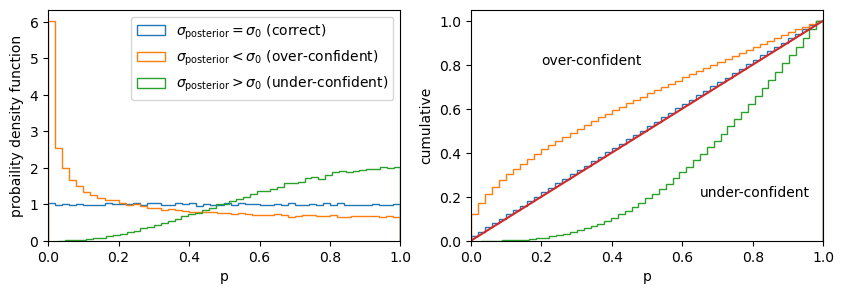

In [4]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
cumulative=False
plt.hist(p_rand_1, bins=50, density=True,cumulative=cumulative,  histtype= 'step', 
         label = r'$\sigma_{\rm posterior} = \sigma_0$ (correct)')

plt.hist(p_rand_2, bins=50, density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} < \sigma_0$ (over-confident)')

plt.hist(p_rand_3, bins=50,  density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} > \sigma_0$ (under-confident)')

plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.legend()
plt.ylabel('probaility density function')
plt.xlabel('p')


plt.subplot(122)
cumulative=True
plt.hist(p_rand_1, bins=50, density=True,cumulative=cumulative,  histtype= 'step', 
         label = r'$\sigma_{\rm posterior} = \sigma_{\rm ensemble}$ (correct)')

plt.hist(p_rand_2, bins=50, density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} < \sigma_{\rm ensemble}$ (over-confident)')

plt.hist(p_rand_3, bins=50,  density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} > \sigma_{\rm ensemble}$ (under-confident)')

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.ylabel('cumulative')
plt.xlabel('p')
plt.text(0.2, 0.8, 'over-confident')
plt.text(0.65, 0.2, 'under-confident')

- Using $n_\sigma = \sqrt{2} \mathrm{erf}^{-1}(\Delta)$ where $\Delta = 1 - p$

Text(0.65, 0.2, 'under-confident')

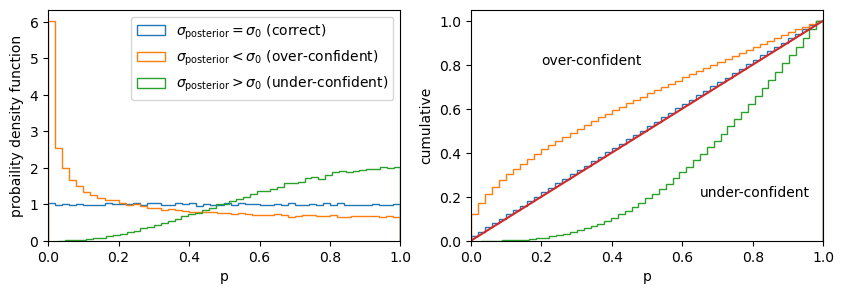

In [5]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
cumulative=False
plt.hist(p_rand_1_from_n_sigma_1, bins=50, density=True,cumulative=cumulative,  histtype= 'step', 
         label = r'$\sigma_{\rm posterior} = \sigma_0$ (correct)')

plt.hist(p_rand_2_from_n_sigma_2, bins=50, density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} < \sigma_0$ (over-confident)')

plt.hist(p_rand_3_from_n_sigma_3, bins=50,  density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} > \sigma_0$ (under-confident)')

plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.legend()
plt.ylabel('probaility density function')
plt.xlabel('p')


plt.subplot(122)
cumulative=True
plt.hist(p_rand_1_from_n_sigma_1, bins=50, density=True,cumulative=cumulative,  histtype= 'step', 
         label = r'$\sigma_{\rm posterior} = \sigma_{\rm ensemble}$ (correct)')

plt.hist(p_rand_2_from_n_sigma_2, bins=50, density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} < \sigma_{\rm ensemble}$ (over-confident)')

plt.hist(p_rand_3_from_n_sigma_3, bins=50,  density=True, cumulative=cumulative, histtype= 'step', 
         label = r'$\sigma_{\rm posterior} > \sigma_{\rm ensemble}$ (under-confident)')

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.ylabel('cumulative')
plt.xlabel('p')
plt.text(0.2, 0.8, 'over-confident')
plt.text(0.65, 0.2, 'under-confident')